In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame(pd.read_pickle("../liquidity_provider_data/wpls_dai.pkl"))

In [6]:
data.head()

,contract_address,event_name,topics,data,block_number,transaction_hash,transaction_index,block_hash,log_index,transaction_from_address,transaction_to_address,transaction_gas,transaction_gas_price
0,0xE56043671df55dE5CDf8459710433C10324DE0aE,Transfer,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,17274011,0x0e5b0c674d01d4401fe07b9880dbeac7a13c708ce288...,6,0x7c0287ac631650a67430e75c34a76297faaf9f3fb341...,129,0x30e22ab6e6B576e6A9c5dD73191237a9A5c72539,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6694552,4830375915803630
1,0xE56043671df55dE5CDf8459710433C10324DE0aE,Transfer,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,17274011,0x0e5b0c674d01d4401fe07b9880dbeac7a13c708ce288...,6,0x7c0287ac631650a67430e75c34a76297faaf9f3fb341...,130,0x30e22ab6e6B576e6A9c5dD73191237a9A5c72539,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6694552,4830375915803630
2,0xE56043671df55dE5CDf8459710433C10324DE0aE,Sync,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x00000000000000000000000000000000000000000008...,17274011,0x0e5b0c674d01d4401fe07b9880dbeac7a13c708ce288...,6,0x7c0287ac631650a67430e75c34a76297faaf9f3fb341...,131,0x30e22ab6e6B576e6A9c5dD73191237a9A5c72539,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6694552,4830375915803630
3,0xE56043671df55dE5CDf8459710433C10324DE0aE,Mint,[0xdbba30eb0402b389513e87f51f4db2db80bed454384...,0x00000000000000000000000000000000000000000008...,17274011,0x0e5b0c674d01d4401fe07b9880dbeac7a13c708ce288...,6,0x7c0287ac631650a67430e75c34a76297faaf9f3fb341...,132,0x30e22ab6e6B576e6A9c5dD73191237a9A5c72539,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,6694552,4830375915803630
4,0xE56043671df55dE5CDf8459710433C10324DE0aE,Sync,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x00000000000000000000000000000000000000000000...,17274468,0xdd4fcf60194c41e74b4110354a4f0f0c1957e4c548e5...,76,0x07b5a999666a2cbcb1ac109b8b69953bd745a392f3cd...,537,0x0d89be2177543fa498Dc544C41A9B932E2BEC908,0x98bf93ebf5c380C0e6Ae8e192A7e2AE08edAcc02,759782,4889937631562006


<Axes: ylabel='event_name'>

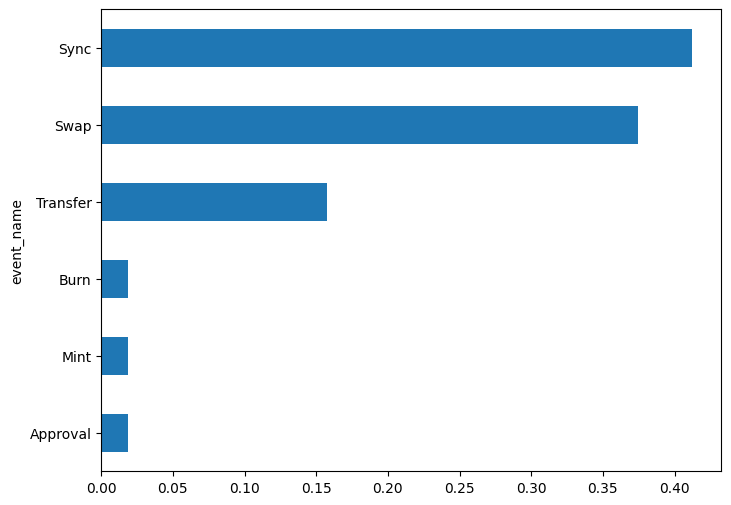

In [7]:
data.value_counts("event_name", normalize=True).sort_values().plot(kind='barh', figsize=(8, 6))

<Axes: xlabel='block_number'>

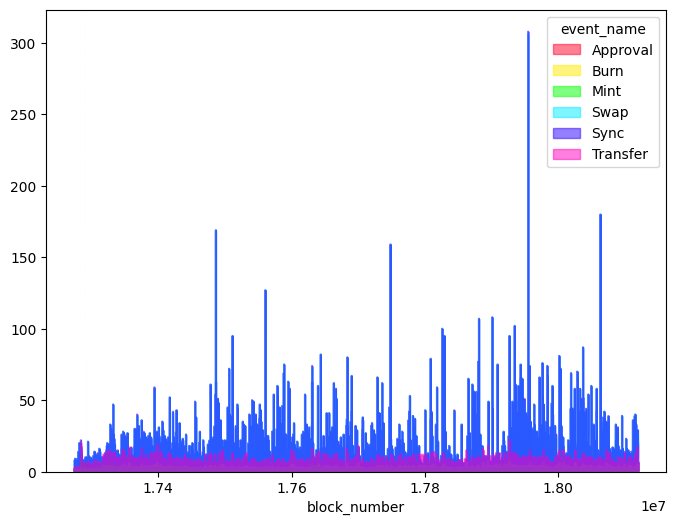

In [8]:
areaplot = data.groupby(['block_number','event_name']).transaction_hash.count().reset_index().pivot(index='block_number', columns='event_name', values='transaction_hash').fillna(0)
areaplot.plot.area(stacked=False, colormap="gist_rainbow",  figsize=(8, 6))

In [9]:
areaplot


event_name,Approval,Burn,Mint,Swap,Sync,Transfer
block_number,,,,,,
17274011,0.0,0.0,1.0,0.0,1.0,2.0
17274468,0.0,0.0,0.0,1.0,1.0,0.0
17274486,0.0,0.0,0.0,1.0,1.0,0.0
17274514,0.0,0.0,0.0,1.0,1.0,0.0
17274529,0.0,0.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...
18119620,0.0,0.0,0.0,1.0,1.0,1.0
18119622,0.0,1.0,1.0,4.0,6.0,7.0
18119624,0.0,0.0,0.0,1.0,1.0,0.0
